<h1 align="center"> US Craft Beers</h1>

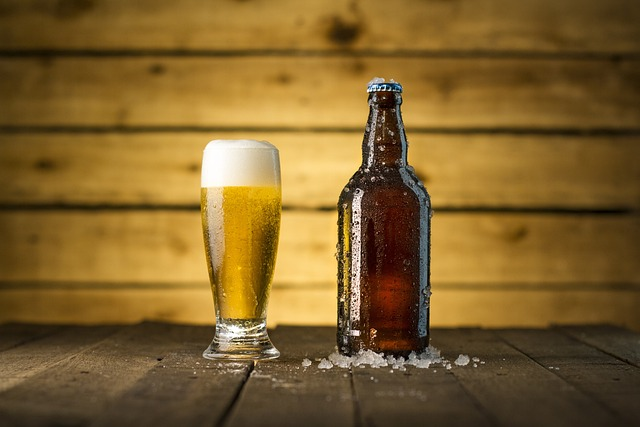

# Introduction

This SQL database contains two tables: beers and breweries in the USA. The characteristics are as follows:

Beers:

1. Name 
2. Id
2. Style
3. Size (ounces)
4. Alcohol by volume (ABV)
5. International Bitterness Units (ibu)
6. Brewer name
7. Brewery ID

Breweries:

1. Name
2. Brewery_id
3. Location (city, state)

The original dataset was sourced [here](https://www.jeannicholashould.com/python-web-scraping-tutorial-for-craft-beers.html), from a detailed webscraping tutorial. In this project, I aim to uncover a detailed analysis (patterns & trends) of the craft beer industry in the USA.  

# Setting up the database connection

**Connect to the craft beer SQLite database and identify 'beers' and 'breweries' as the key data tables:**

In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("data/beers.db")

In [2]:
query = """
SELECT name 
FROM sqlite_master 
WHERE type='table';
"""
df = pd.read_sql_query(query, conn)
df

,name
0,beers
1,breweries


**The schemas of 'beers' and 'breweries' tables was explored to show column names and data types within each table:**

In [3]:
for table in ['beers','breweries']:
    
    query = f"""
    PRAGMA table_info({table});
    """
    df = pd.read_sql_query(query, conn)
    print(df[['name','type']])
    print('='*40)

         name     type
0         abv     REAL
1         ibu     REAL
2          id  INTEGER
3        name     TEXT
4       style     TEXT
5  brewery_id  INTEGER
6      ounces     REAL
         name     type
0  brewery_id  INTEGER
1        name     TEXT
2        city     TEXT
3       state     TEXT


# SQL Queries

**I started by inspecting the database's metadata, loading all the schemas from the `sqlite_master` table.**

In [4]:

metadata_query = """

SELECT type, name, tbl_name, rootpage, sql
FROM sqlite_master;
"""

metadata_result = pd.read_sql_query(metadata_query, conn)
metadata_result

,type,name,tbl_name,rootpage,sql
0,table,beers,beers,2,"CREATE TABLE ""beers"" (\n""abv"" REAL,\n ""ibu"" R..."
1,table,breweries,breweries,40,"CREATE TABLE ""breweries"" (\n""brewery_id"" INTEG..."


**I retrieved the first 5 rows of the 'beers' table, referencing key characteristics such as; 'abv', 'ibu', 'name', and 'style'.**



In [5]:

five_rows_beers_query = """

SELECT abv, ibu, name, style
FROM beers
LIMIT 5;

"""
five_rows_beers_result = pd.read_sql_query(five_rows_beers_query, conn)
five_rows_beers_result


,abv,ibu,name,style
0,0.050,None,Pub Beer,American Pale Lager
1,0.066,None,Devil's Cup,American Pale Ale (APA)
2,0.071,None,Rise of the Phoenix,American IPA
3,0.090,None,Sinister,American Double / Imperial IPA
4,0.075,None,Sex and Candy,American IPA


**Similarly, the first 5 rows of the 'breweries' table was queried to extract the 'brewery_id', 'name', 'city', and 'state'.**



In [6]:

five_rows_breweries_query = """

SELECT brewery_id, name, city, state
FROM breweries
LIMIT 5;
"""
five_rows_breweries_result = pd.read_sql_query(five_rows_breweries_query, conn)
five_rows_breweries_result


,brewery_id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


**The 'beers' table was queried to extract the total number of entries.**



In [7]:

beers_total_rows_query = """

SELECT COUNT(*) AS row_count
FROM beers;

"""
beers_total_rows_result = pd.read_sql_query(beers_total_rows_query, conn)
beers_total_rows_result


,row_count
0,2410


**Unique beer styles in the 'beers' table were counted to assess the diversity of styles represented in the dataset, reflecting the craft beer market's diversity:**


In [8]:

distinct_styles_query = """

SELECT COUNT(DISTINCT(style)) AS distinct_styles
FROM beers;

"""
distinct_styles_result = pd.read_sql_query(distinct_styles_query, conn)
distinct_styles_result


,distinct_styles
0,99


**Q6. The alcoholic content was analysed by calculating the minimum, average, and maximum alcohol content ('abv') in the 'beers' table, identifying brewing trends and preferences:**

In [9]:
alcoholic_content_query = """

SELECT MIN(abv) AS 'min', AVG(abv) AS 'avg', MAX(abv) AS 'max'
FROM beers;
"""
alcoholic_content_result = pd.read_sql_query(alcoholic_content_query, conn)
alcoholic_content_result


,min,avg,max
0,0.001,0.059773,0.128


**The 'beers' table can now be queried to obtain the 'abv' values. We can then plot the distribution of alcohol content for further detailed analysis.**


In [10]:

abv_distribution_query = """

SELECT abv 
FROM beers;
"""
abv_distribution_result = pd.read_sql_query(abv_distribution_query, conn)
abv_distribution_result


,abv
0,0.050
1,0.066
2,0.071
3,0.090
4,0.075
...,...
2405,0.067
2406,0.052
2407,0.055
2408,0.055


**The histogram (30 bins) represents the distribution of alcohol content, providing detailed insights into the variation of beer strength.**

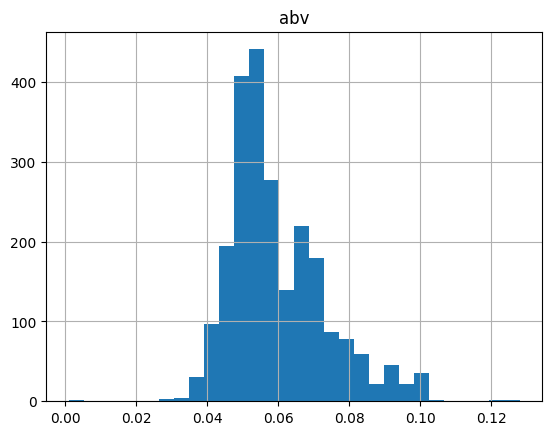

In [11]:
abv_hist = abv_distribution_result.hist(bins=30);

**The distinct types of IPA styles in the 'beers' table was extracted and ordered to explore the diversity within this popular beer category, for a targeted analysis of IPAs.**


In [12]:

ipa_styles_query = """

SELECT DISTINCT(style) AS ipa_styles
FROM beers
WHERE style LIKE '%IPA%'
ORDER BY style ASC;
"""
ipa_styles_result = pd.read_sql_query(ipa_styles_query, conn)
ipa_styles_result


,ipa_styles
0,American Double / Imperial IPA
1,American IPA
2,American White IPA
3,Belgian IPA
4,English India Pale Ale (IPA)


**The average bitterness of lager beers and pale ale beers were calculated to compare flavour profiles. Results include "lager", "IPA", "APA" or "Pale Ale"  styles. **


In [13]:

ale_bitterness_query = """

SELECT AVG(ibu)
FROM beers
WHERE style LIKE '%IPA%' OR style LIKE '%APA%' OR style LIKE '%Pale Ale%';

"""
ale_bitterness_result = pd.read_sql_query(ale_bitterness_query, conn)
print(ale_bitterness_result)

lager_bitterness_query = """

SELECT AVG(ibu)
FROM beers
WHERE style LIKE '%lager%';
"""
lager_bitterness_result = pd.read_sql_query(lager_bitterness_query, conn)
print(lager_bitterness_result)




    AVG(ibu)
0  63.353571
    AVG(ibu)
0  22.863636


**The number of beers per style were identified and ranked by frequnecy, highlighting the predominant styles in the craft beer market:**


In [14]:

style_count_query = """

SELECT DISTINCT(style), COUNT(style) AS number
FROM beers
GROUP BY style
ORDER BY number DESC
LIMIT 10;
"""
style_count_result = pd.read_sql_query(style_count_query, conn)
style_count_result


,style,number
0,American IPA,424
1,American Pale Ale (APA),245
2,American Amber / Red Ale,133
3,American Blonde Ale,108
4,American Double / Imperial IPA,105
5,American Pale Wheat Ale,97
6,American Brown Ale,70
7,American Porter,68
8,Saison / Farmhouse Ale,52
9,Witbier,51


**The `beers` and `breweries` tables were queried to list all the breweries and beers found in San Francisco. An 'INNER JOIN' was used to merge both tables based on the 'brewery_id' column. Results provide an ordered overview of craft beers in San Francisco.**

In [15]:
beers_and_brewery_query = """

SELECT breweries.name AS brewery, beers.name AS beer
FROM breweries
INNER JOIN beers
ON beers.brewery_id = breweries.brewery_id
WHERE breweries.city = 'San Francisco'
ORDER BY breweries.name ASC, beers.name ASC;
"""
beers_and_brewery_result = pd.read_sql_query(beers_and_brewery_query, conn)
beers_and_brewery_result


,brewery,beer
0,21st Amendment Brewery,21st Amendment IPA (2006)
1,21st Amendment Brewery,21st Amendment Watermelon Wheat Beer (2006)
2,21st Amendment Brewery,Back in Black
3,21st Amendment Brewery,Bitter American
4,21st Amendment Brewery,Bitter American (2011)
5,21st Amendment Brewery,Brew Free! or Die IPA
6,21st Amendment Brewery,Brew Free! or Die IPA (2008)
7,21st Amendment Brewery,Brew Free! or Die IPA (2009)
8,21st Amendment Brewery,Fireside Chat
9,21st Amendment Brewery,Fireside Chat (2010)


**The query below extracts the ten largest breweries, prioritised by the extent of distinct beers produced. Brewery_id was used to avoid duplicate brewery names in different states.**

In [16]:
largest_breweries_query = """
SELECT breweries.name AS name, COUNT(*) AS "number of beers"
FROM beers
INNER JOIN breweries
ON beers.brewery_id = breweries.brewery_id
GROUP BY breweries.brewery_id, breweries.name 
ORDER BY "number of beers" DESC, name ASC
LIMIT 10;
"""
largest_breweries_result = pd.read_sql_query(largest_breweries_query, conn)
largest_breweries_result

,name,number of beers
0,Brewery Vivant,62
1,Sun King Brewing Company,38
2,Oskar Blues Brewery,33
3,Cigar City Brewing Company,25
4,Sixpoint Craft Ales,24
5,Hopworks Urban Brewery,23
6,Stevens Point Brewery,22
7,21st Amendment Brewery,20
8,Great Crescent Brewery,20
9,Bonfire Brewing Company,19


**The Scatter plot below shows the top 10 US states ordered by the number of breweries and beers produced. Colorado ranks the highest in the craft beer industry.**


In [29]:
top_10_states_query = """
SELECT
    brew.state AS state
    , COUNT(DISTINCT(brew.brewery_id)) AS breweries
    , COUNT(*) AS beers
FROM beers
JOIN breweries AS brew
ON beers.brewery_id = brew.brewery_id
GROUP BY state
ORDER BY breweries DESC, state ASC
LIMIT 10
"""
top_10_states_result = pd.read_sql_query(top_10_states_query, conn)
top_10_states_result

# top_10_states_query = """
#     SELECT state, count(*) AS "breweries", sum(b.beers) "beers" FROM breweries
#     JOIN 
#         (SELECT brewery_id, count(*) AS beers
#          FROM beers
#          GROUP BY brewery_id) b 
#     ON b.brewery_id = breweries.brewery_id
#     GROUP BY state
#     ORDER BY breweries DESC, state ASC
#     LIMIT 10
# """

,state,breweries,beers
0,CO,47,265
1,CA,39,183
2,MI,32,162
3,OR,29,125
4,TX,28,130
5,PA,25,100
6,MA,23,82
7,WA,23,68
8,IN,22,139
9,WI,20,87


           state  breweries  beers
0     California         39    183
1          Texas         28    130
2      Wisconsin         20     87
3       Colorado         47    265
4     Washington         23     68
5         Oregon         29    125
6       Michigan         32    162
7   Pennsylvania         25    100
8  Massachusetts         23     82
9        Indiana         22    139


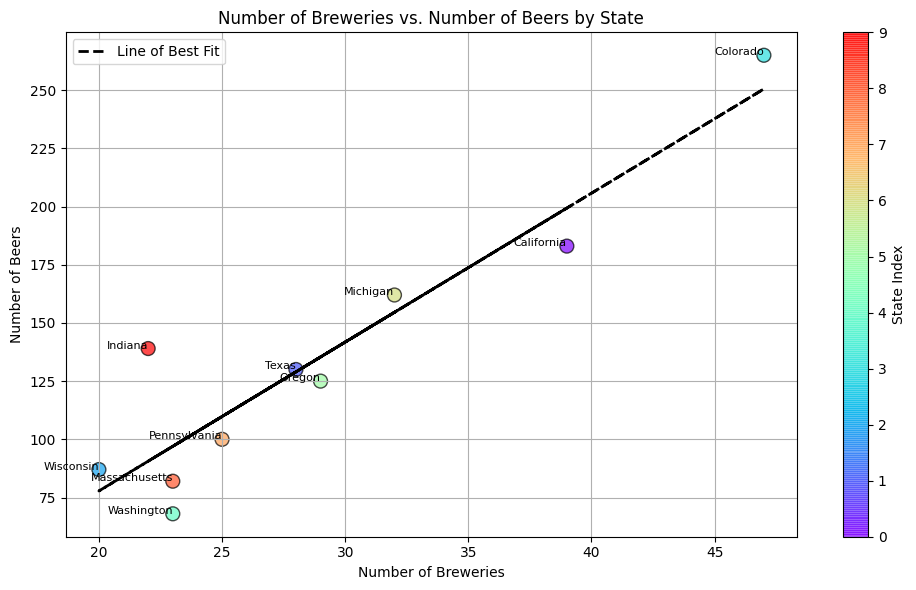

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
results = [
    ('California', 39, 183),
    ('Texas', 28, 130),
    ('Wisconsin', 20, 87),
    ('Colorado', 47, 265),
    ('Washington', 23, 68),
    ('Oregon', 29, 125),
    ('Michigan', 32, 162),
    ('Pennsylvania', 25, 100),
    ('Massachusetts', 23, 82),
    ('Indiana', 22, 139)
]

# Convert the list of tuples into a DataFrame
df = pd.DataFrame(results, columns=['state', 'breweries', 'beers'])

# Display DataFrame
print(df)

data = df

df1 = pd.DataFrame(data)

# regression line
z = np.polyfit(df1['breweries'], df1['beers'], 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
plt.scatter(df1['breweries'], df1['beers'], s=100, c=range(len(df)), cmap='rainbow', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Number of Breweries')
plt.ylabel('Number of Beers')
plt.title('Number of Breweries vs. Number of Beers by State')

# Add state labels
for i, txt in enumerate(df1['state']):
    plt.annotate(txt, (df1['breweries'][i], df1['beers'][i]), fontsize=8, ha='right')

# Plot line of best fit
plt.plot(df1['breweries'], p(df1['breweries']), '--k', linewidth=2, label='Line of Best Fit')

plt.colorbar(label='State Index')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


** Relationship between ABV and IBU. The correlation heatmap shows a moderate positive correlation of 0.67 between ABV and IBU, suggesting beers with higher ABV tend to be more bitter. However, the relationship is not strong enough to predict bitterness solely based on alcohol content:**

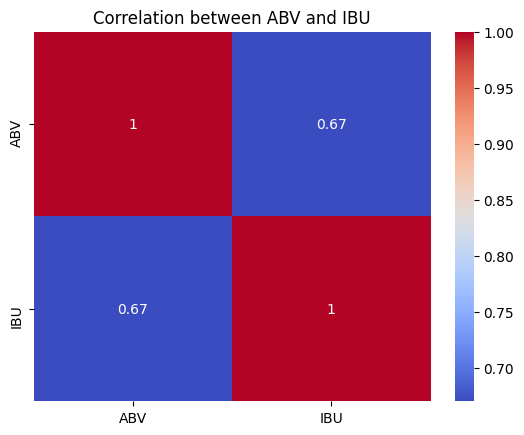

In [26]:
abv_ibu_query = """
SELECT abv AS ABV, ibu AS IBU
FROM beers;
"""
abv_ibu_df = pd.read_sql_query(abv_ibu_query, conn)

correlation_data = abv_ibu_df.dropna()
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between ABV and IBU")

plt.show()

**The bar chart displays the average ABV for craft beers across various states, revealing Nevada as having the highest average ABV and Utah as having the lowest. The data suggests consistentency in ABV among beers in most states, with Nevada and Utah marking the upper and lower bounds of this range. The results could be indicative of state-specific regulations, consumer tastes, or brewing traditions that influence the alcohol content in craft beer production:**

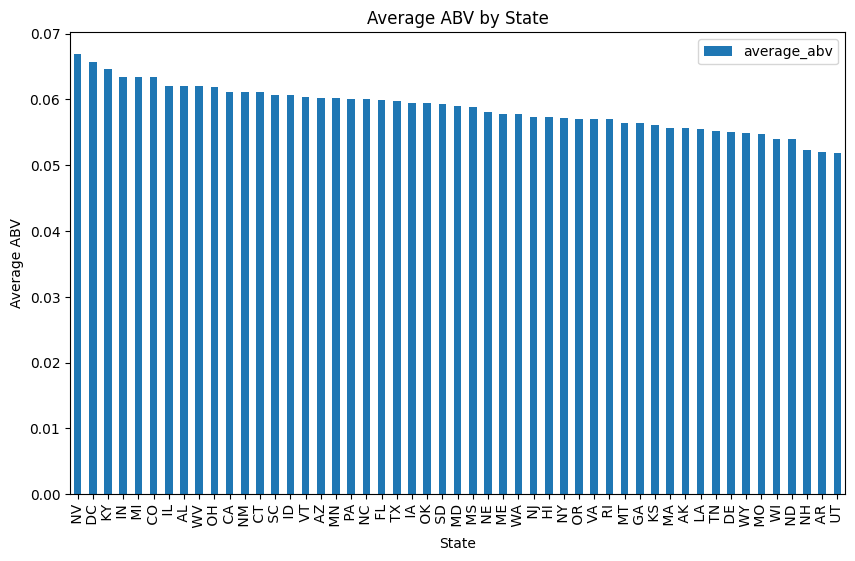

In [31]:
avg_abv_by_state_query = """
SELECT state, AVG(abv) as average_abv
FROM beers
JOIN breweries ON beers.brewery_id = breweries.brewery_id
GROUP BY state
ORDER BY average_abv DESC;
"""
avg_abv_by_state = pd.read_sql_query(avg_abv_by_state_query, conn)

avg_abv_by_state.plot(kind='bar', x='state', y='average_abv', figsize=(10, 6))
plt.title("Average ABV by State")
plt.ylabel("Average ABV")
plt.xlabel('State')

plt.show()

**The bar chart indicates that "ale" is the most frequently occurring word in beer names, suggesting its popularity. "wheat" appears as the least common word, which may indicate a lower flavor or style preference.**

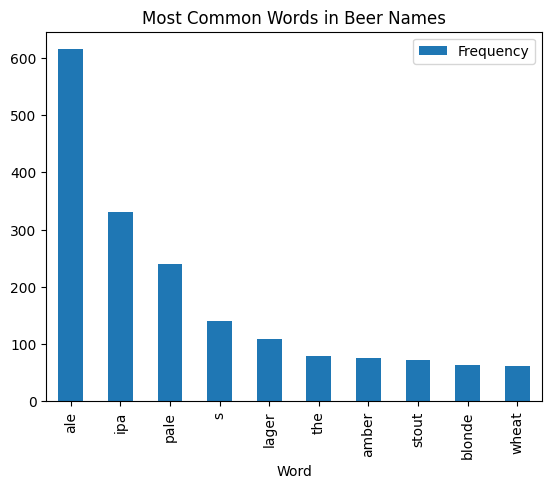

In [35]:
from collections import Counter
import re

query_beers = """
SELECT *
FROM beers;
"""
beers = pd.read_sql_query(query_beers, conn)

words = Counter(re.findall(r'\w+', ' '.join(beers['name']).lower()))
most_common_words = words.most_common(10)

words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
words_df.plot(kind='bar', x='Word', y='Frequency')
plt.title("Most Common Words in Beer Names")

plt.show()

# Next steps...

- Deeper analysis of average ABV in beer production by state, using geopandas and geographical plotting. This may show regional trends in craft beer preferences and production across the US.